In [1]:
import numpy as np
from matplotlib import colormaps
from tsne_manager import TSNEManager
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["font.size"] = 14

lexicon = {
    "EN": {
        "title": "2D cluster's map:\n",
        "residue_distance": "Distance between amino acids",
        "heavy_atoms": "Coordinates of heavy atoms",
        "lennard_jones": "Lennard-Jones interaction energy",
    },
    "RU": {
        "title": "2D карта кластеров:\n",
        "residue_distance": "Расстояние между аминокислотами",
        "heavy_atoms": "Координаты тяжелых атомы",
        "lennard_jones": "Энергия взаимодействия Леннарда-Джонса",
    },
}

In [2]:
tsne_output_log = "tsne_log.csv"
calculations_dir = "calculations"
lang = "EN"

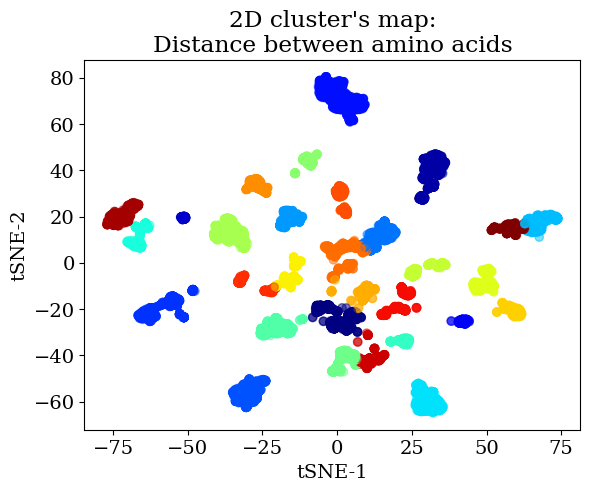

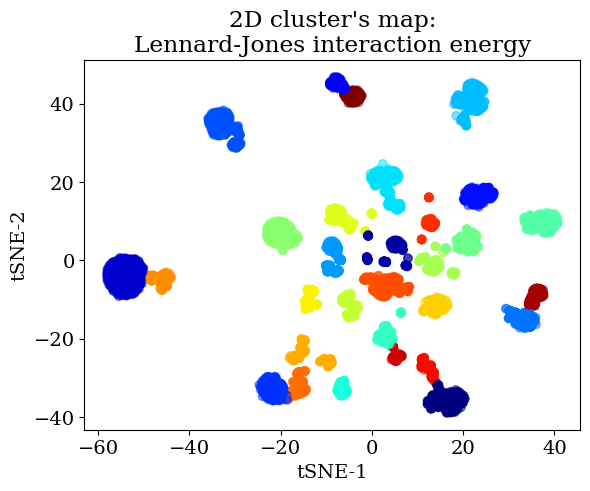

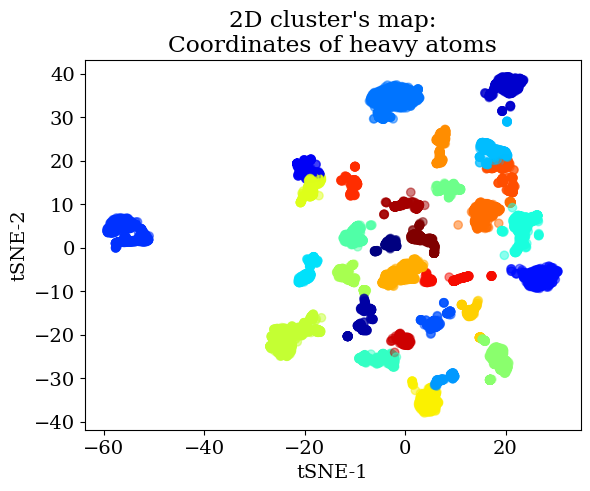

In [3]:
tsne_manager = TSNEManager(tsne_output_log)

best_features = tsne_manager.get_best()

for feature in best_features:
    plt.figure()
    
    perplexity = tsne_manager.get_best()[feature]["perplexity"].iloc[0]
    n_clusters = tsne_manager.get_best()[feature]["clusters"].iloc[0]
    
    transform_coords = np.loadtxt(f'{calculations_dir}/{feature}/transformed/{perplexity}.dat')
    cluster_labels = np.loadtxt(f'{calculations_dir}/{feature}/clusters/{perplexity}/{n_clusters}.dat')
    
    cmap = colormaps.get_cmap('jet')
    plt.scatter(transform_coords[:,0], transform_coords[:,1], c=cluster_labels.astype(float), alpha=0.5, cmap=cmap)
    
    plt.title(f"{lexicon[lang]['title']}{lexicon[lang][feature]}")
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")

In [4]:
rmsd = np.fromfile("calculations/heavy_atoms/rmsd.dat", dtype=np.float32)
rmsd = rmsd.reshape(int(np.sqrt(rmsd.shape[0])), int(np.sqrt(rmsd.shape[0])))

In [5]:
for feature in best_features.keys():
    result = {}
    result["cluster"] = []
    result["rmsd_avg"] = []
    result["rmsd_max"] = []
    
    perplexity = tsne_manager.get_best()[feature]["perplexity"].iloc[0]
    n_clusters = tsne_manager.get_best()[feature]["clusters"].iloc[0]

    cluster_labels = np.loadtxt(f'{calculations_dir}/{feature}/clusters/{perplexity}/{n_clusters}.dat')

    c_members = {i: np.where(cluster_labels == i)[0] for i in range(int(n_clusters))}

    avg_rmsd_of_clusters = []
    max_rmsd_of_clusters = []

    for cluster_index, frames in c_members.items():
        rmsds = []
        num_frames = len(frames)
        for a in range(num_frames):
            for b in range(a+1, num_frames):
                rmsds.append(rmsd[frames[a]][frames[b]])
                
        result["cluster"].append(cluster_index+1)
        result["rmsd_avg"].append(np.average(rmsds))
        result["rmsd_max"].append(np.max(rmsds))

        avg_rmsd_of_clusters.append(np.average(rmsds))
        max_rmsd_of_clusters.append(np.max(rmsds))
    print(lexicon[lang][feature])
    result = pd.DataFrame(result)
    print(result)
    print(result.describe())
    print()

Distance between amino acids
    cluster  rmsd_avg  rmsd_max
0         1  0.720774     1.280
1         2  0.367224     0.833
2         3  0.193200     0.382
3         4  0.308906     0.798
4         5  0.175077     0.798
5         6  0.437105     0.972
6         7  0.346827     1.040
7         8  0.315324     0.660
8         9  0.406435     0.972
9        10  0.449831     1.040
10       11  0.230686     0.868
11       12  0.373904     0.972
12       13  0.332578     1.080
13       14  0.625682     1.280
14       15  0.389940     0.937
15       16  0.439330     1.110
16       17  0.719060     1.280
17       18  0.661881     1.180
18       19  0.540359     0.972
19       20  0.515071     1.110
20       21  0.385409     1.010
21       22  0.484009     1.210
22       23  0.441925     1.150
23       24  0.716704     1.280
24       25  0.550285     1.110
25       26  0.630664     1.040
26       27  0.635037     1.080
27       28  0.524042     2.260
28       29  0.195190     0.521
29       30